<a href="https://colab.research.google.com/github/sangjin94/itwill-python/blob/main/ml10_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

# 데이터 셋 준비

In [ ]:
wine_csv = 'https://bit.ly/wine-date'  # CSV 파일이 저장된 github 주소

In [ ]:
wine = pd.read_csv(wine_csv)  # DataFrame 생성

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.tail()

,alcohol,sugar,pH,class
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0
6496,11.8,0.8,3.26,1.0


In [ ]:
wine['class'].value_counts()
# 0: red wine, 1: white wine

1.0    4898
0.0    1599
Name: class, dtype: int64

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
# DataFrame에서 feature matrix(2d array)와 target vector(1d array) 생성

In [ ]:
X = wine[['alcohol', 'sugar', 'pH']].values
X[:5]

array([[9.4 , 1.9 , 3.51],
       [9.8 , 2.6 , 3.2 ],
       [9.8 , 2.3 , 3.26],
       [9.8 , 1.9 , 3.16],
       [9.4 , 1.9 , 3.51]])

In [ ]:
y = wine['class'].values
y[:5]

array([0., 0., 0., 0., 0.])

In [ ]:
# Decision Tree를 시각화할 때 사용
feature_names = wine.columns[:-1]  # 특성 이름들: [alcohol, sugar, pH]
target_names = ['red wine', 'white wine']  # 타겟 이름들(0: red, 1: white)

In [ ]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [ ]:
X_train.shape, X_test.shape

((5197, 3), (1300, 3))

In [ ]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([1279, 3918]))

In [ ]:
np.unique(y_test, return_counts=True)

(array([0., 1.]), array([320, 980]))

# Decision Tree 분류

In [ ]:
# decision tree 분류기 생성
tree_clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# decision tree 모델 훈련 -> tree 생성
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

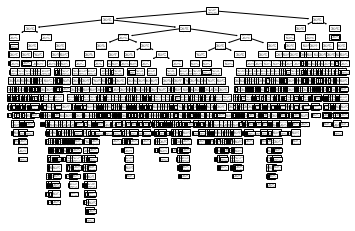

In [ ]:
# decision tree 시각화
plot_tree(tree_clf)
plt.show()

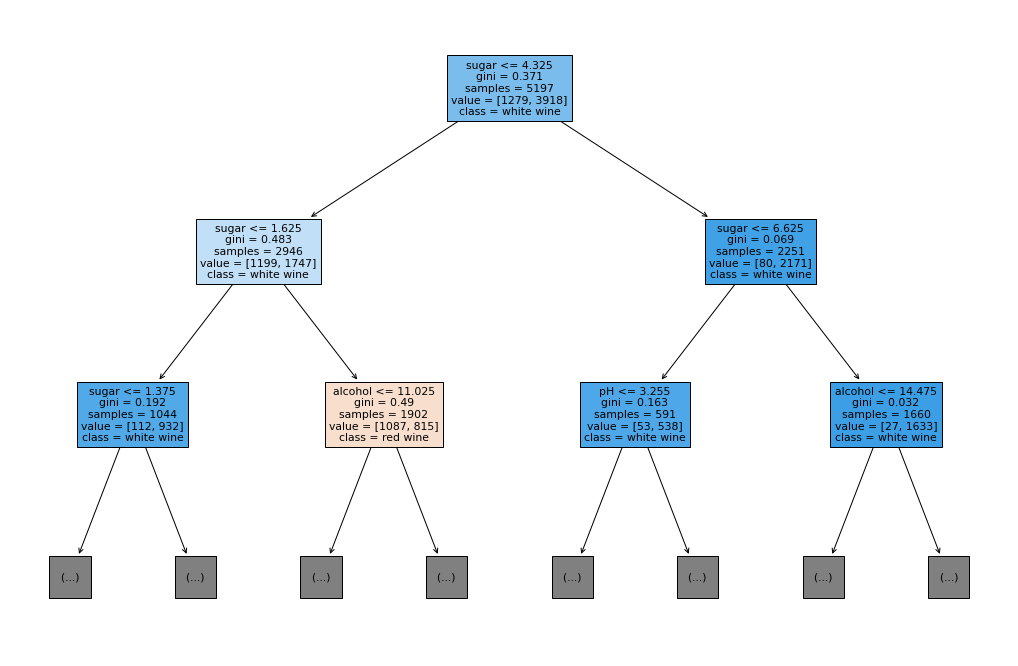

In [ ]:
# decision tree가 너무 복잡하기 때문에, 처음 2개 depth까지만 시각화
plt.figure(figsize=(18, 12))
plot_tree(tree_clf, max_depth=2, filled=True,
          feature_names=feature_names, class_names=target_names)
plt.show()

**Gini impurity(불순도)**

$
Gini = 1 - \sum_i p_i^2
$

* $p_i$: i번째 클래스가 될 확률
* 이진분류(binary class)
    * gini = 1 - [(양성 클래스 확률)^2 + (음성 클래스 확률)^2]
    * 양성과 음성의 비율이 1:1인 경우, gini = 0.5. 불순도 최대
    * 양성 또는 음성으로 완벽히 분류된 경우, gini = 0. 불순도 최소
* Decision tree는 부모 노드와 자식 노드의 Gini 불순도 차이가 가능한 커지도록 tree를 성장시킴.

**Entropy(엔트로피)**

$
Entropy = - \sum_i p_i \log_k(p_i)
$

* k: 클래스의 개수(이진 분류인 경우, k = 2)
* $ p_i $: i번째 클래스가 될 확률.
* 이진 분류
    * 양성과 음성의 비율이 1:1인 경우, $ Entropy = -( \frac{1}{2} \log_2(\frac{1}{2}) + \frac{1}{2} \log_2(\frac{1}{2}) ) = 1 $. 불순도 최대인 경우.
    * 양성 또는 음성 한쪽으로 완벽히 분류된 경우, Entropy = 0. 불순도 최소인 경우.
* entropy를 decision tree의 criterion으로 사용하는 경우에는, 부모 노드와 자식 노드에서 entropy의 차이가 가능한 한 커지도록 tree를 생성.

In [ ]:
# 훈련 셋 평가
train_pred = tree_clf.predict(X_train)
accuracy_score(y_train, train_pred)

0.9978833942659227

In [ ]:
confusion_matrix(y_train, train_pred)

array([[1276,    3],
       [   8, 3910]])

In [ ]:
# 테스트 셋 평가
test_pred = tree_clf.predict(X_test)
accuracy_score(y_test, test_pred)
# train과 test에서 평가 점수의 차이가 너무 큼. 과적합이 큼.

0.8653846153846154

* Decision tree의 장점
    * 특성들을 스케일링할 필요가 없다.
    * 결과를 이해하기 쉽다.

* Decision tree의 단점
    * 과적합(overfitting) 되기 쉽다.
    * 여러가지 규제를 적용해서 과적합 문제를 해결.

* Decision tree의 규제 하이퍼파라미터: 생성자를 호출할 때 설정
    * `max_depth`: decision tree의 최대 깊이
    * `max_leaf_node`: leaf 노드의 최댓값
    * `min_samples_split`: 노드가 분할되기 위해서 가져야 하는 최소 샘플 수
    * `min_samples_leaf`: leaf 노드가 가져야 할 최소 샘플 수
    * `max_features`: 각 노드에서 분할에 사용할 특성의 최대 수
    * `max_`로 시작하는 파라미터의 값을 증가시키면, 규제가 감소됨. 이 값을 감소시키면, 규제가 증가됨. overfitting이 줄어듦.
    * `min_`으로 시작하는 파라미터의 값을 증가시키면, 규제가 커짐. overfitting이 줄어듦.

In [ ]:
# 모델 생성
tree_clf_2 = DecisionTreeClassifier(min_samples_split=0.1, # 전체 샘플의 10% 이상
                                    random_state=42)
# 모델 훈련
tree_clf_2.fit(X_train, y_train)
# 훈련 셋 점수(정확도): X_train의 예측값을 계산 후, 실제값 y_train과 비교해서 정확도를 계산
print('train acc:', tree_clf_2.score(X_train, y_train))
# 테스트 셋 점수(정확도)
print('test acc:', tree_clf_2.score(X_test, y_test))

train acc: 0.8595343467385029
test acc: 0.8523076923076923


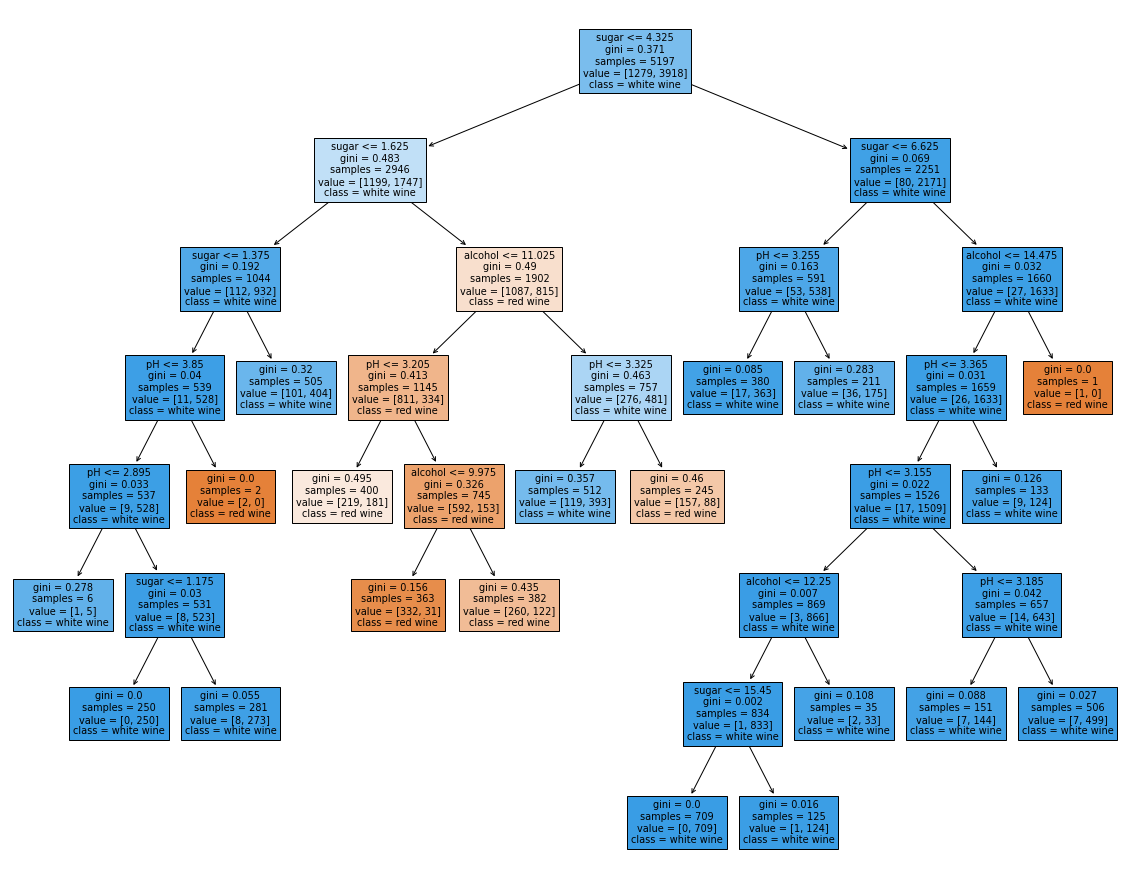

In [ ]:
plt.figure(figsize=(20, 16))
plot_tree(tree_clf_2, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()

In [ ]:
# 모델 생성
tree_clf_3 = DecisionTreeClassifier(min_samples_split=0.2, # 전체 샘플의 20% 이상
                                    random_state=42)
# 모델 훈련
tree_clf_3.fit(X_train, y_train)
# 훈련 셋 점수(정확도): X_train의 예측값을 계산 후, 실제값 y_train과 비교해서 정확도를 계산
print('train acc:', tree_clf_3.score(X_train, y_train))
# 테스트 셋 점수(정확도)
print('test acc:', tree_clf_3.score(X_test, y_test))

train acc: 0.8458726188185491
test acc: 0.8407692307692308


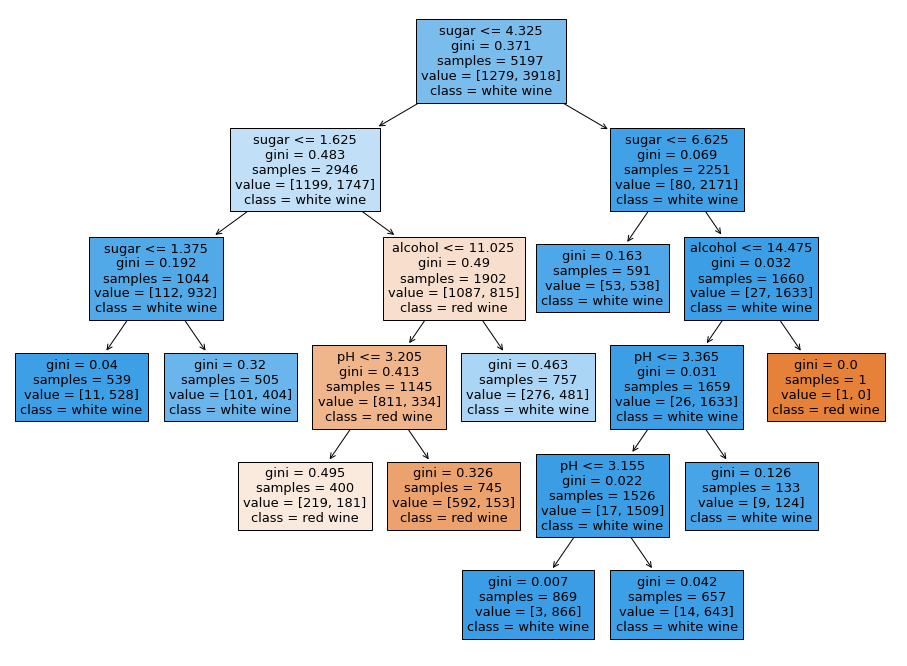

In [ ]:
plt.figure(figsize=(16, 12))
plot_tree(tree_clf_3, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()

# Hyperparameter 튜닝

* 전체 데이터를 훈련(train)-검증(validation)-테스트(test) 셋으로 나눔.
* 하이퍼파라미터를 변화시키면서 훈련 셋으로 모델을 훈련(fit)
* 하이퍼파라미터 설정 결과를 검증 셋으로 테스트.
* 검증 셋에서 점수가 가장 좋은 모델(하이퍼 파라미터)를 선택
* 튜닝이 끝난 모델의 일반화 성능을 예측하기 위한 용도로만 테스트 셋을 사용

In [ ]:
# 전체 데이터를 훈련/테스트 셋으로 분리
X_tr_full, X_test, y_tr_full, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        stratify=y,
                                                        random_state=42)

In [ ]:
# 훈련 셋을 다시 훈련/검증 셋으로 분리
X_train, X_val, y_train, y_val = train_test_split(X_tr_full, y_tr_full,
                                                  test_size=0.2,
                                                  stratify=y_tr_full,
                                                  random_state=42)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((4157, 3), (1040, 3), (1300, 3))

`max_depth`의 변화에 따른 (훈련/검증 셋) 정확도의 변화 시각화

In [ ]:
train_scores = []  # 훈련 셋의 정확도를 저장할 리스트
val_scores = []    # 검증 셋의 정확도를 저장할 리스트
tree_depths = np.arange(1, 20)  # hyperparameter max_depth로 사용할 값들
for d in tree_depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    tree.fit(X_train, y_train)
    train_scores.append(tree.score(X_train, y_train))
    val_scores.append(tree.score(X_val, y_val))

print(train_scores)
print(val_scores)

[0.7539090690401732, 0.8270387298532595, 0.8272792879480394, 0.8636035602598028, 0.8691363964397402, 0.8775559297570363, 0.8888621602116912, 0.8987250420976666, 0.9112340630262208, 0.9314409429877315, 0.9451527543901852, 0.9554967524657205, 0.9692085638681741, 0.9821987009862881, 0.9862881885975463, 0.9901371181140245, 0.9944671638200625, 0.9961510704835218, 0.9975944190522011]
[0.7538461538461538, 0.8298076923076924, 0.8298076923076924, 0.864423076923077, 0.875, 0.8682692307692308, 0.8615384615384616, 0.864423076923077, 0.8567307692307692, 0.8586538461538461, 0.8576923076923076, 0.8605769230769231, 0.8711538461538462, 0.8730769230769231, 0.8711538461538462, 0.8701923076923077, 0.8759615384615385, 0.8740384615384615, 0.8730769230769231]


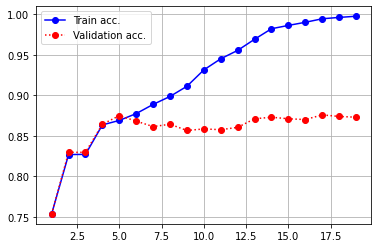

In [ ]:
plt.plot(tree_depths, train_scores, 'bo-', label='Train acc.')
plt.plot(tree_depths, val_scores, 'ro:', label='Validation acc.')
plt.grid()
plt.legend()
plt.show()

위 결과를 보면 tree의 max_depth를 5보다 더 키우는 것은, 테스트 셋의 정확도로 높이지는 못하고, 과적합만 키우는 결과임을 알 수 있음.
하이퍼파라미터 max_depth를 5로 설정한 모델을 생성, 전체 훈련 셋으로 학습(fit)시킨 후, 테스트 셋으로 일반화 성능을 예측해 볼 수 있음.

In [ ]:
# 모델 선택
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
# 모델 훈련
tree_clf.fit(X_tr_full, y_tr_full)
# 일반화 성능
tree_clf.score(X_test, y_test)

0.8576923076923076